# Linear Regression using Batch Gradient Descent

This project provides an implementation of a **Linear Regression** model, following Stanford CS299 lecture. The primary goal is to find the best parameters (theta) that define the line of best fit for a given dataset.

The model uses the **Batch Gradient Descent** algorithm to minimize the **Least-Squares Cost Function**.

Variables:
* $n$ is the number of features.
* $m$ is the number of training examples.
* $\mathbf{\theta}$ is the parameters, an $(n+1)$-dimensional vector, where $\mathbf{\theta}_0$ is the bias.
* $\mathbf{x}^{(i)}$ is the features, an $(n+1)$-dimensional vector.
* $y^{(i)}$ is the actual target value for the $i^{th}$ example.
* $J(\theta)$ is the cost function.
* $\alpha$ is the learning rate.

Notes:
* Choosing $\alpha$ is important to make gradient descent works in practice. If $\alpha$ is too large, the algorithm can overshoot the minimum. If $\alpha$ is too small, the algorithm will be too slow.

Advantages:
* A very roboust supervised learning algorithm. Less complicated than other learning algorithm. Easy to debug.
* The sum of square is a good choice of cost function because in this case, the local minimum of $J$ is the same as the global minimum of $J$. Hence there is less convergence issues.

Disvantages:
* Poor performance vs. other supervised learning algorithms if the dataset satisfies other assumptions.

Disvantages of Batch:
* Can be very slow if the size of training examples is large. This can be remedied by using stochastic gradient descent.

TODO:
- [] Add more practical usage tips.

## Assumptions on Using Linear Regression
Probabilistically, the ideal scenario to use linear regression with the least-squares cost function is when the dataset satisfies the following assumptions:
* There is a **true** value satisfies a **linear** relationship with the data $$y = \mathbf{\theta} \cdot \mathbf{x} + \epsilon,$$ where $\epsilon$ is the error term, including unmodelled effect and random noise.
* The error term $\epsilon$ has **Gaussian distribution** with mean $0$ and variance $\sigma^2$.
* The error terms are distributed independent and identically distributed.

Under the above assumption, it can be shown mathematically that the result of linear regression gives the best parameter $\theta$ such that the probability
$$\mathbb{P}(y \ |\ \mathbf{x}; \theta)$$
is maximized.

TODO:
- [] Add an example.

In [13]:
import math, copy
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt

### The Least-Squares Cost Function

The cost function chosen here is the least-squares cost function. The formula is:
$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_{\mathbf{\theta}}(\mathbf{x}^{(i)}) - y^{(i)})^2$$

Note:
* The sum of square is a good choice of cost function because in this case, the local minimum of J is the same as the global minimum of J.

Where:
* $\frac{1}{2}$ is the standard coefficient to avoid constant in the gradient.
* $J(\theta)$ is the cost function.
* $n$ is the number of features.
* $m$ is the number of training examples.
* $\mathbf{x}^{(i)}$ is the features, an $(n+1)$-dimensional vector, where we set $x_0 = 1$.
* $\mathbf{\theta}$ is the parameters, an $(n+1)$-dimensional vector, where $\mathbf{\theta}_0$ is the bias.
* $h_{\mathbf{\theta}}(\mathbf{x}^{(i)}) = \mathbf{\theta} \cdot \mathbf{x}^{(i)}$ is the model's prediction for the $i^{th}$ example.
* $y^{(i)}$ is the actual target value for the $i^{th}$ example.

Complexity:
* Time: $O(m*n)$
* Space: $O(1)$

In [25]:
def compute_least_square_cost(x: ndarray, y: ndarray, theta: ndarray):
    """
    Computes the least-squares cost function J
    Args:
        x (ndarray (m,n+1))       : features, m examples, n features 
        y (ndarray (m, ))         : target values, m examples
        theta (ndarray (n+1, ))   : parameters [theta_0 (bias), theta_1, ... theta_n]

    Returns:
        float: The value of the cost function J.

    Complexity:
        Time: O(m*n)
        Space: O(1) auxiliary

    Notes:
        This implementation uses a for-loop for readability. A faster computation
        can be achieved using NumPy's vector operation.
    """
    
    (m, num_parameters) = x.shape
    cost = 0

    for i in range(m):
        h = theta @ x[i] # Prediction. Time: O(n)
        cost = cost + (h - y[i])**2 

    cost = (1/2) * cost
    return cost
        

### Future Work
- [] Create an optimized compute_least_square_cost_vectorized function that uses NumPy operations instead of a for-loop. The current version should be kept for its readability.
- [] Might consider using Mean Square Error (MSE) with coefficient $\frac{1}{2m}$.

## Gradient of the Least-Squares Cost function

Here we compute the gradient of the least square cost function. The formula is:
$$
\frac{\partial J}{\partial \theta_j} = \sum_{i=1}^{m} \left( \  (h_{\mathbf{\theta}}(\mathbf{x}^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \  \right)
$$

Note:
* As we chooe the coefficient $\frac{1}{2}$ in our least square formula, we can avoid a coefficient in the gradient.

Where:
* $J(\theta)$ is the cost function.
* $n$ is the number of features.
* $m$ is the number of training examples.
* $\mathbf{x}^{(i)}$ is the features, an $(n+1)$-dimensional vector, where we set $x_0 = 1$.
* $\mathbf{\theta}$ is the parameters, an $(n+1)$-dimensional vector, where $\mathbf{\theta}_0$ is the bias.
* $h_{\mathbf{\theta}}(\mathbf{x}^{(i)}) = \mathbf{\theta} \cdot \mathbf{x}^{(i)}$ is the model's prediction for the $i^{th}$ example.
* $y^{(i)}$ is the actual target value for the $i^{th}$ example.

Implementation Note:
* We want to swap i and j in the nested the for-loop to avoid duplicate computation of h

In [23]:
def compute_least_square_gradient(x: ndarray, y: ndarray, theta: ndarray):
    """
    Computes the gradient for the least square cost function J.

    Args:
        x (ndarray (m,n+1))       : features, m examples, n features 
        y (ndarray (m,))          : target values, m examples
        theta (ndarray (n+1,))    : parameters [theta_0 (bias), theta_1, ... theta_n]

    Return:
        (ndarray (n+1,)): n+1 coefficients for the gradient vector of J
    
    Complexity:
        Time: O(m*n)
        Space: O(1) auxiliary

    Notes:
        This implementation uses a for-loop for readability. A faster computation
        can be achieved using NumPy's vector operation.
    """

    m, num_parameters = x.shape
    dj_dtheta = np.zeros(num_parameters) # Gradient vector of J

    # The loop i and j are swapped to reduced duplicate computation of h
    for i in range(m):
        h = theta @ x[i] # Prediction. Time: O(n)
        
        for j in range(num_parameters):
            dj_dtheta[j] = (h - y[i]) * x[i, j]

    return dj_dtheta
         

**Inefficient Implementation (For Reference):**
```python
"""
put i as the inner loop add duplicate computation of h
"""
for j in range(num_parameters):
    for i in range(m):
        h = theta @ x[i]
        dj_dtheta[j] = (dj_dtheta[j] - y[i]) * x[i,j]
```

### Future Work
- [] Note that if we invoke both the compute_least_square_cost and compute_least_square_gradient function in each iteration of gradient descent, we need to do the expensive computation $\mathbf{\theta} \cdot \mathbf{x}^{(i)} - y^{(i)}$ twice. Can improve this linear regression algorithm by using a different structure to avoid the duplicate computation.
- [] Create an optimized vectorized version that uses NumPy vector operations instead of a for-loop. The current version should be kept for its readability.

## Batch Gradient Descent using Least-Squares Cost Function

Here we use the least-squares cost function to implement the gradient descent algorithm for linear regression. We update the parameters as follows, in a given number of iteration:

$$\theta_j := \theta_j - \alpha \frac{\partial J}{\partial \theta_j}$$

Where:
* $\alpha$ is the learning rate.
* $J(\theta)$ is the cost function.
* $n$ is the number of features.
* $m$ is the number of training examples.
* $\mathbf{x}^{(i)}$ is the features, an $(n+1)$-dimensional vector, where we set $x_0 = 1$.
* $\mathbf{\theta}$ is the parameters, an $(n+1)$-dimensional vector, where $\mathbf{\theta}_0$ is the bias.
* $h_{\mathbf{\theta}}(\mathbf{x}^{(i)}) = \mathbf{\theta} \cdot \mathbf{x}^{(i)}$ is the model's prediction for the $i^{th}$ example.
* $y^{(i)}$ is the actual target value for the $i^{th}$ example.

Note:
* Choosing $\alpha$ is important to make gradient descent works in practice. If $\alpha$ is too large, the algorithm can overshoot the minimum. If $\alpha$ is too small, the algorithm will be too slow.
* Here for the ease of implementation, we chooes to fix the number of iteration. One can improve this algorithm by checking if the parameters has converged. Several ways to checking convergence are (1) looking at the update rate; (2) checking if gradient is zero; or (3) using a combination of (1) and (2).

In [18]:
def gradient_descent(x: ndarray, 
                     y: ndarray, 
                     theta, alpha, num_iters, 
                     cost_function, 
                     gradient_function):
    """
    Performs gradient descent to fit parameter theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
        x (ndarray (m,n+1))       : features, m examples, n features 
        y (ndarray (m,))          : target values, m examples
        theta (ndarray (n+1,))    : parameters [theta_0 (bias), theta_1, ... theta_n]
        alpha (float)             : learning rate
        num_iters (int)           : number of iterations to run gradient descent
        cost_function             : function to call to produce cost
        gradient_function         : function to call to produce gradient
      
    Returns:
        theta     : Updated value of parameter after running gradient descent
        J_history : A list to store cost J for every iteration

    Complexity:
        time: O(num_iters * n * m)
      """
    
    J_history = []
    
    for i in range(num_iters):
        # Computes gradient and update theta using learning rate alpha
        gradient = gradient_function(x, y, theta)
        theta = theta - alpha * gradient

        # Save the cost J in every iteration
        cost = cost_function(x, y, theta)
        J_history.append(cost)

    return theta, J_history
    

## Future Work
- [] Implement stochastic gradient descent.

# Testing
We use the following AI-generated code for testing and visualization.

## Generate random data

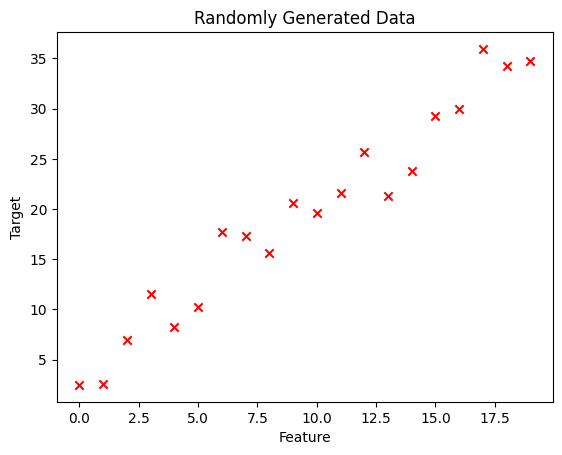

In [37]:
# Initialize number of features n and the number of training set m
m = 20
n = 1

# Generate some synthetic data
np.random.seed(42) # for reproducibility
x_train_simple = np.arange(0, m, 1)
y_train_simple = 2 * x_train_simple + 1 + np.random.randn(len(x_train_simple)) * 3

# Add a column of ones to x for the bias term (theta_0)
X_train = np.c_[np.ones(len(x_train_simple)), x_train_simple]
y_train = y_train_simple

# Create a scatter plot of the data
plt.scatter(x_train_simple, y_train_simple, marker='x', color='r')
plt.title("Randomly Generated Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

## --- 1. Initialize Parameters ---

In [44]:
# Initialize parameters for the gradient descent function
initial_theta = np.zeros(X_train.shape[1]) # Starting from zeros since the cost function is convex
iterations = 1500
alpha = 0.0001

## --- 2. Run Gradient Descent ---

In [45]:
# These variables should already be defined from your previous cell
# X_train, y_train, initial_theta, alpha, iterations

# Call your gradient descent function to learn the parameters
theta, J_history = gradient_descent(X_train, y_train, initial_theta, alpha, iterations, 
                                    compute_least_square_cost, 
                                    compute_least_square_gradient)

print("Final theta found by gradient descent:", theta)

Final theta found by gradient descent: [0.09603063 1.82458201]


## --- 3. Visualize the Results ---

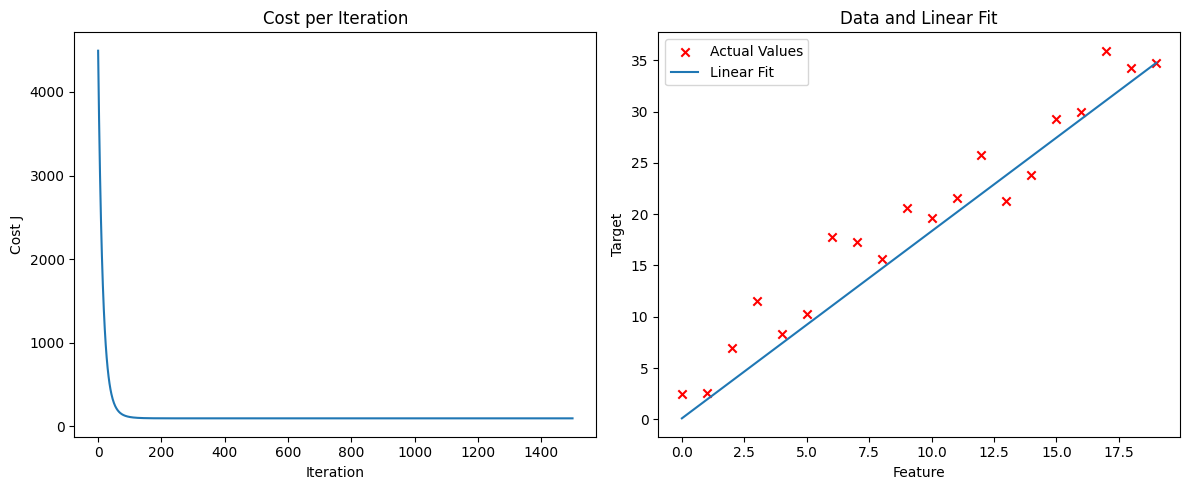

In [46]:
# Plot 1: Cost per Iteration
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.title("Cost per Iteration")

# Plot 2: Linear Fit on the Data
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
plt.scatter(X_train[:, 1], y_train, marker='x', color='red', label='Actual Values')

# Calculate the predictions from your model
predictions = X_train @ theta

# Plot the regression line
plt.plot(X_train[:, 1], predictions, label='Linear Fit')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Data and Linear Fit")
plt.legend()

plt.tight_layout() # Adjusts plots to prevent overlap
plt.show()